In [184]:
import pandas as panda
from matplotlib import pyplot as plt
from datetime import datetime as dt

dataframe = panda.read_csv('Ruter_data.csv', delimiter=';')

dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [185]:
timelist = ['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra',
            'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra',
            'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra',
            'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']

for x in timelist:
    dataframe.loc[dataframe[x].str.startswith(":"), x] = dataframe[x].str.replace(':', '', 1)
    dataframe.loc[dataframe[x].str.startswith("24"), x] = dataframe[x].str.replace('24', '00', 1)
    dataframe.loc[dataframe[x].str.startswith("25"), x] = dataframe[x].str.replace('25', '01', 1)
    
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [186]:
dataframe['Måned'] = panda.DatetimeIndex(dataframe['Dato']).month

dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Måned
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,10
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,8
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,3
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,7
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,8


In [187]:
dataframe.shape

(6000, 18)

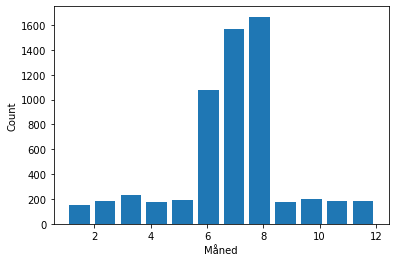

In [188]:
plt.hist(dataframe.Måned, bins=12, rwidth=0.8)
plt.xlabel('Måned')
plt.ylabel('Count')
plt.show()

#I have chosen to not remove outliers for months since I think it's better to have all months

In [189]:
dataframe['Ankomst_time'] = dataframe['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].str[:2]
dataframe.loc[dataframe['Ankomst_time'].str.startswith("0"), 'Ankomst_time'] = dataframe['Ankomst_time'].str.replace('0', '', 1)

dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Måned,Ankomst_time
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,10,10
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,8,13
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,3,10
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,7,13
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,8,7


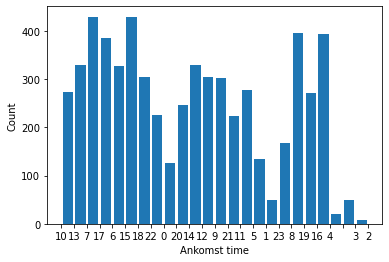

In [190]:
plt.hist(dataframe.Ankomst_time, bins=24, rwidth=0.8)
plt.xlabel('Ankomst time')
plt.ylabel('Count')
plt.show()

In [191]:
#threshold_min = dataframe['Ankomst_time'].quantile(0.10)
#threshold_max = dataframe['Ankomst_time'].quantile(0.90)

#dataframe=dataframe[(dataframe['Ankomst_time']<threshold_max) & (dataframe['Ankomst_time']>threshold_min)]

#dataframe.shape

In [192]:
dataframe['Prosent_av_kapasitet_ombordstigning'] = round((dataframe['Passasjerer_Ombord'] / dataframe['Kjøretøy_Kapasitet'])*100, 2)

dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Måned,Ankomst_time,Prosent_av_kapasitet_ombordstigning
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,10,10,4.46
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,8,13,4.46
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,3,10,5.36
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,7,13,8.93
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,8,7,8.93


In [193]:
dataframe.shape

(6000, 20)

In [194]:
plt.hist(dataframe.Ombordstigning_prosent_av_kapasitet, bins=10, rwidth=0.8)
plt.xlabel('Prosent ombordsteget')
plt.ylabel('Antall')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Ombordstigning_prosent_av_kapasitet'

In [195]:
threshold_max = dataframe['Ombordstigning_prosent_av_kapasitet'].quantile(0.90)
threshold_min = dataframe['Ombordstigning_prosent_av_kapasitet'].quantile(0.10)

new_dataframe=dataframe[(dataframe['Ombordstigning_prosent_av_kapasitet']<threshold_max) & (dataframe['Ombordstigning_prosent_av_kapasitet']>threshold_min)]

new_dataframe.shape

KeyError: 'Ombordstigning_prosent_av_kapasitet'

In [196]:
dataframe['Ukedag'] = panda.DatetimeIndex(dataframe['Dato']).weekday

dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Måned,Ankomst_time,Prosent_av_kapasitet_ombordstigning,Ukedag
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:53,10:53:59,10:53:00,10:53:00,112,5,10,10,4.46,3
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,13:12:20,13:12:26,13:12:00,13:12:00,112,5,8,13,4.46,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,10:18:56,10:19:21,10:19:00,10:19:00,112,6,3,10,5.36,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,13:52:04,13:52:26,13:51:00,13:51:00,112,10,7,13,8.93,0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,07:34:13,07:34:53,07:33:00,07:33:00,112,10,8,7,8.93,3


In [197]:
#I wanted to add a feature for how a late a bus is by subtracting the values 
#from Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra from the values from Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,
#but i could not get datetime to work

<AxesSubplot:>

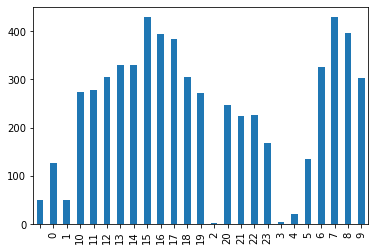

In [198]:
#Shows what time of day there are the most departures
dataframe['Ankomst_time'].value_counts().sort_index().plot.bar()

Text(0, 0.5, 'Frequency')

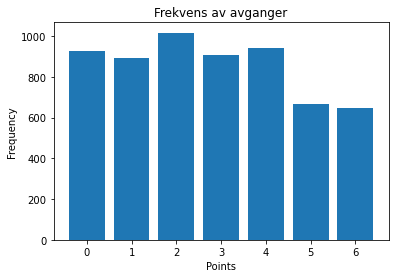

In [199]:
#Compares frequency of departures on weekdays

fig, ax = plt.subplots()

data = dataframe['Ukedag'].value_counts()

Ukedag = data.index
frequency = data.values

ax.bar(points, frequency)

ax.set_title('Frekvens av avganger') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

In [200]:
dataframe['Ombordstigning_prosent_av_kapasitet'].plot.line(title="Prosent ombordstigning")

KeyError: 'Ombordstigning_prosent_av_kapasitet'

<AxesSubplot:>

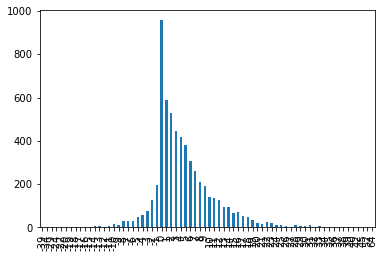

In [201]:
dataframe['Passasjerer_Ombord'].value_counts().sort_index().plot.bar()